In [1]:
import numpy as np
from scipy.optimize import minimize
import matplotlib.pyplot as plt

import variational_tfd as tfd
from whole_process import tfd_generator

# Preparing the TFD

Following [Wu, Hsieh 2018](https://arxiv.org/abs/1811.11756), [Zhu et al 2019](https://arxiv.org/pdf/1906.02699.pdf), and [Green et al. 2021](https://arxiv.org/abs/2112.02068), we implement a variational circuit which prepares the thermofield double for a transverse field Ising model. For simplicity we only consider a system with 3 spins, so we have a total of 6 qubits.

We have implemented the variational circuit in variational_tfd.py. 

### Comparing different layers

For each layer configuration, we consider a few different temperatures.

In [16]:
betas = [0.1+0.5*x for x in range(10)]

We begin by considering a circuit with only one layers.

In [20]:
d = 1
# we initialize the angles randomnly at first
angles = tfd.random_angles(4*d)

In [21]:
%%time
# number of layers 
results1 = []
for beta in betas:
    # the reference state is
    tfd_ref = tfd_generator().generate_tfd(beta)
    # we build the QAOA circuit
    qaoa = tfd.QAOA_TFD(3, d, angles)
    # for the optimization we use minimize with the following args
    optimizer = lambda f, theta: minimize(f, theta, method='CG', tol=1e-5, options={'maxiter': 4000, 'gtol': 1e-5})
    # we define the variational algorithm
    cooker = tfd.StateCooker(qaoa, tfd_ref, 'aer_simulator', optimizer)
    results1.append(cooker.optimize())

CPU times: user 14 s, sys: 342 ms, total: 14.3 s
Wall time: 12.7 s


In [ ]:
fidelities1 = [1-result.fun for result in results1]
plt.plot(betas, fidelities1)
plt.show()

In [39]:
%%time
# number of layers 
results_beta = []
beta = 2
# the reference state is
tfd_ref = tfd_generator().generate_tfd(beta)
# for the optimization we use minimize with the following args
optimizer1 = lambda f, theta: minimize(f, theta, method='CG', tol=1e-4, options={'maxiter': 4000, 'gtol': 1e-3})
optimizer2 = lambda f, theta: minimize(f, theta, method='BFGS', tol=1e-12, options={'maxiter': 4000, 'gtol': 1e-8})
d = 1
for j in range(50):
    # we initialize the angles randomnly at first
    angles = tfd.random_angles(4*d)
    # we build the QAOA circuit
    qaoa = tfd.QAOA_TFD(3, d, angles)
    # we define the variational algorithm
    cooker = tfd.StateCooker(qaoa, tfd_ref, 'aer_simulator', optimizer1)
    results_beta.append(cooker.optimize())

CPU times: user 38.5 s, sys: 848 ms, total: 39.3 s
Wall time: 39.3 s


Let's plot the fidelity obtained as a function of beta. 

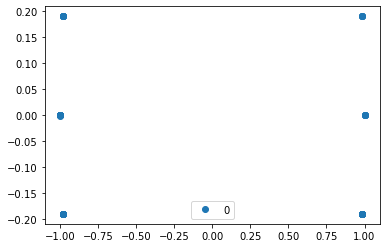

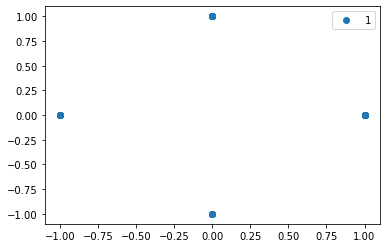

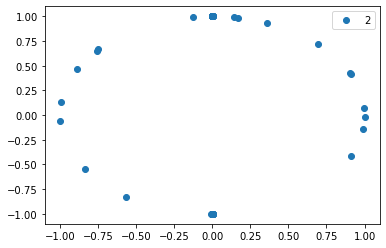

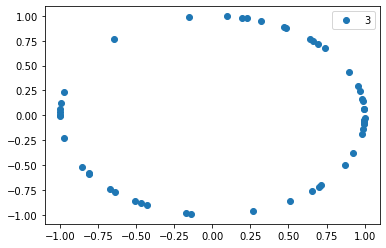

In [53]:
for j in range(4):
    plt.plot([np.cos(results_beta[i].x[j]) for i in range(50)], [np.sin(results_beta[i].x[j]) for i in range(50)], 'o', label=f'{j}')
    plt.legend()
    plt.show()

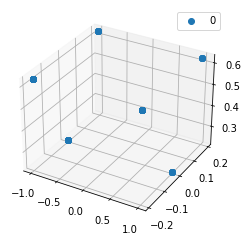

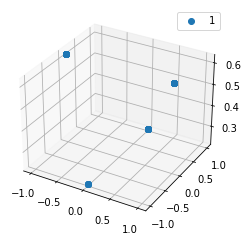

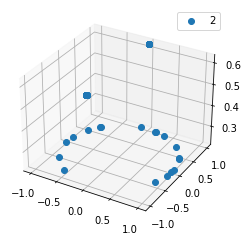

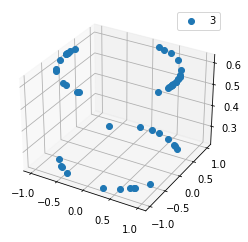

In [56]:
for j in range(4):
    ax = plt.axes(projection='3d')
    x_line = [np.cos(results_beta[i].x[j]) for i in range(50)]
    y_line = [np.sin(results_beta[i].x[j]) for i in range(50)]
    z_line = [1-results_beta[i].fun for i in range(50)]
    ax.plot3D(x_line, y_line, z_line, 'o', label=f'{j}')
    plt.legend()
    plt.show()

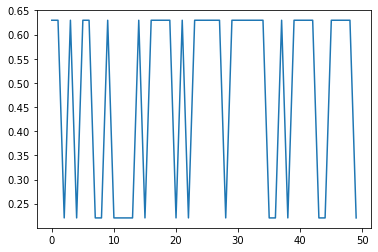

0.36

In [44]:
fidelities_beta = [1-result.fun for result in results_beta]
plt.plot(fidelities_beta)
plt.show()
len([x for x in fidelities_beta if x<0.5])/50

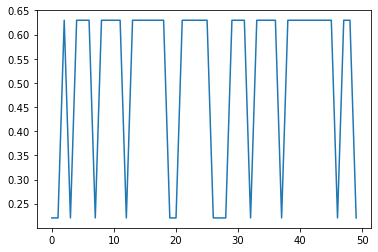

In [30]:
fidelities_beta = [1-result.fun for result in results_beta]
plt.plot(fidelities_beta)
plt.show()

In [34]:
len([x for x in fidelities_beta if x<0.5])/50

0.28

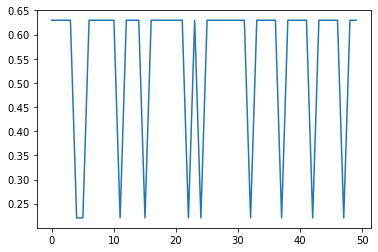

0.2

In [36]:
fidelities_beta = [1-result.fun for result in results_beta]
plt.plot(fidelities_beta)
plt.show()
len([x for x in fidelities_beta if x<0.5])/50

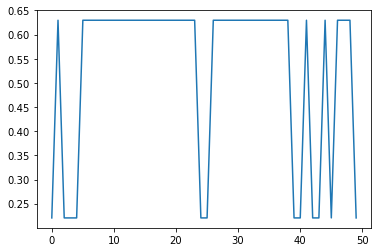

0.24

In [38]:
fidelities_beta = [1-result.fun for result in results_beta]
plt.plot(fidelities_beta)
plt.show()
len([x for x in fidelities_beta if x<0.5])/50

Let's plot also the number of iterations.

In [88]:
d = 2
# we initialize the angles randomnly at first
angles = tfd.random_angles(4*d)

In [89]:
%%time
# number of layers 
results2 = []
for beta in betas:
    # the reference state is
    tfd_ref = tfd_generator().generate_tfd(beta)
    # we build the QAOA circuit
    qaoa = tfd.QAOA_TFD(3, d, angles)
    # for the optimization we use minimize with the following args
    optimizer = lambda f, theta: minimize(f, theta, method='COBYLA', tol=1e-3, options={'maxiter': 1000})
    # we define the variational algorithm
    cooker = tfd.StateCooker(qaoa, tfd_ref, 'aer_simulator', optimizer)
    results2.append(cooker.optimize())

CPU times: user 1min 4s, sys: 969 ms, total: 1min 5s
Wall time: 1min 3s


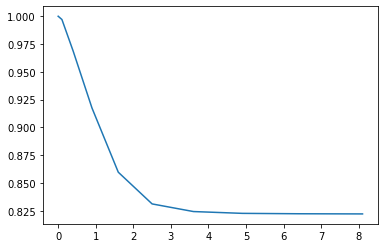

In [90]:
fidelities2 = [1-result.fun for result in results2]
plt.plot(betas, fidelities2)
plt.show()

In [92]:
d = 3
# we initialize the angles randomnly at first
angles = tfd.random_angles(4*d)

In [99]:
%%time
# number of layers 
results3 = []
for beta in betas:
    # the reference state is
    tfd_ref = tfd_generator().generate_tfd(beta)
    # we build the QAOA circuit
    qaoa = tfd.QAOA_TFD(3, d, angles)
    # for the optimization we use minimize with the following args
    optimizer = lambda f, theta: minimize(f, theta, method='COBYLA', tol=1e-3, options={'maxiter': 2000})
    # we define the variational algorithm
    cooker = tfd.StateCooker(qaoa, tfd_ref, 'aer_simulator', optimizer)
    results3.append(cooker.optimize())

CPU times: user 3min 8s, sys: 2.68 s, total: 3min 11s
Wall time: 3min 9s


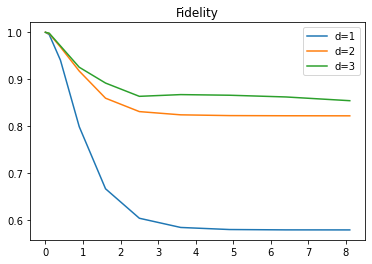

In [100]:
fidelities1 = [1-result.fun for result in results1]
fidelities2 = [1-result.fun for result in results2]
fidelities3 = [1-result.fun for result in results3]
plt.plot(betas, fidelities1, label='d=1')
plt.plot(betas, fidelities2, label='d=2')
plt.plot(betas, fidelities3, label='d=3')
plt.title('Fidelity')
plt.legend(loc='best')
plt.show()

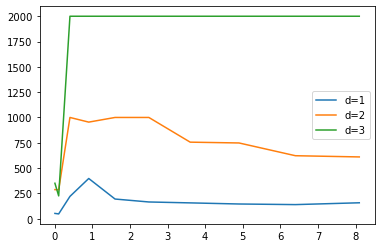

In [101]:
iterations1 = [result.nfev for result in results1]
iterations2 = [result.nfev for result in results2]
iterations3 = [result.nfev for result in results3]
plt.plot(betas, iterations1, label='d=1')
plt.plot(betas, iterations2, label='d=2')
plt.plot(betas, iterations3, label='d=3')
plt.legend(loc='best')
plt.title('Iterations')
plt.show()

### Training layer by layer

Instead of picking all the initial angles at random we consider the angles on the first layers as found in the previous optimizations. 

In [127]:
d = 1
# we initialize the angles randomnly at first
angles = tfd.random_angles(4*d)

In [128]:
%%time
# number of layers 
resultsL1 = []
for beta in betas:
    # the reference state is
    tfd_ref = tfd_generator().generate_tfd(beta)
    # we build the QAOA circuit
    qaoa = tfd.QAOA_TFD(3, d, angles)
    # for the optimization we use minimize with the following args
    optimizer = lambda f, theta: minimize(f, theta, method='COBYLA', tol=1e-3, options={'maxiter': 1000})
    # we define the variational algorithm
    cooker = tfd.StateCooker(qaoa, tfd_ref, 'aer_simulator', optimizer)
    resultsL1.append(cooker.optimize())

CPU times: user 11.9 s, sys: 272 ms, total: 12.2 s
Wall time: 10.3 s


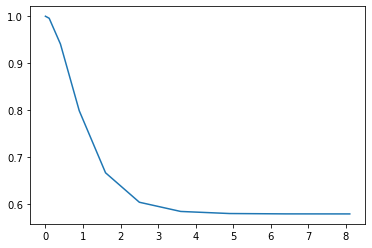

In [129]:
fidelitiesL1 = [1-result.fun for result in resultsL1]
plt.plot(betas, fidelitiesL1)
plt.show()

In [130]:
d = 2
# we initialize the angles randomnly at first
angles += tfd.random_angles(4)

In [131]:
%%time
# number of layers 
resultsL2 = []
for beta in betas:
    # the reference state is
    tfd_ref = tfd_generator().generate_tfd(beta)
    # we build the QAOA circuit
    qaoa = tfd.QAOA_TFD(3, d, angles)
    # for the optimization we use minimize with the following args
    optimizer = lambda f, theta: minimize(f, theta, method='COBYLA', tol=1e-3, options={'maxiter': 1000})
    # we define the variational algorithm
    cooker = tfd.StateCooker(qaoa, tfd_ref, 'aer_simulator', optimizer)
    resultsL2.append(cooker.optimize())

CPU times: user 17.9 s, sys: 369 ms, total: 18.2 s
Wall time: 16.4 s


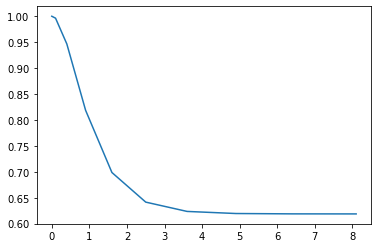

In [132]:
fidelitiesL2 = [1-result.fun for result in resultsL2]
plt.plot(betas, fidelitiesL2)
plt.show()

In [133]:
d = 3
# we initialize the angles randomnly at first
angles += tfd.random_angles(4)

In [134]:
%%time
# number of layers 
resultsL3 = []
for beta in betas:
    # the reference state is
    tfd_ref = tfd_generator().generate_tfd(beta)
    # we build the QAOA circuit
    qaoa = tfd.QAOA_TFD(3, d, angles)
    # for the optimization we use minimize with the following args
    optimizer = lambda f, theta: minimize(f, theta, method='COBYLA', tol=1e-3, options={'maxiter': 2000})
    # we define the variational algorithm
    cooker = tfd.StateCooker(qaoa, tfd_ref, 'aer_simulator', optimizer)
    resultsL3.append(cooker.optimize())

CPU times: user 1min 57s, sys: 2.1 s, total: 1min 59s
Wall time: 1min 58s


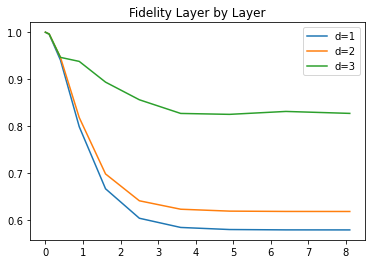

In [135]:
fidelitiesL3 = [1-result.fun for result in resultsL3]
plt.plot(betas, fidelitiesL1, label='d=1')
plt.plot(betas, fidelitiesL2, label='d=2')
plt.plot(betas, fidelitiesL3, label='d=3')
plt.title('Fidelity Layer by Layer')
plt.legend(loc='best')
plt.show()

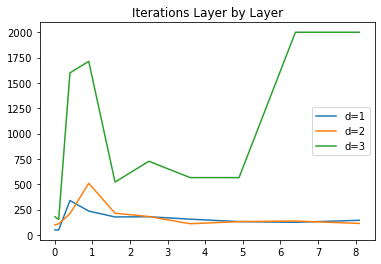

In [136]:
iterationsL1 = [result.nfev for result in resultsL1]
iterationsL2 = [result.nfev for result in resultsL2]
iterationsL3 = [result.nfev for result in resultsL3]
plt.plot(betas, iterationsL1, label='d=1')
plt.plot(betas, iterationsL2, label='d=2')
plt.plot(betas, iterationsL3, label='d=3')
plt.title('Iterations Layer by Layer')
plt.legend(loc='best')
plt.show()

A few observations
- The final fidelities achieved depend quite a lot on the original choice of angles. If the draw is unlucky, the algorithm doesn't get even close to preparing the TFD.
- In [Zhu et al 2019](https://arxiv.org/pdf/1906.02699.pdf), the authors claim that they can achieve $F = 0.76$ with $p=1$, $F=0.88$ with $p=2$, and $F=1$ with $p=3$. Clearly, we are not doing as good. 

**TO DO:** 
Play with hyperparameters and check whether we can do better.

### Optimal angles as function of temperature

We plot the optimal angles as a function of $\beta$, and see if they have some simple behaviour. To speed up the process we consider $d=1$. 

In [162]:
N = 100
betas = [0.01*x for x in range(N)]
d = 1
# we initialize the angles randomnly at first
angles = tfd.random_angles(4*d)

In [163]:
%%time
# number of layers 
results_angles = []
for beta in betas:
    # the reference state is
    tfd_ref = tfd_generator().generate_tfd(beta)
    # we build the QAOA circuit
    qaoa = tfd.QAOA_TFD(3, d, angles)
    # for the optimization we use minimize with the following args
    optimizer = lambda f, theta: minimize(f, theta, method='COBYLA', tol=1e-3, options={'maxiter': 1000})
    # we define the variational algorithm
    cooker = tfd.StateCooker(qaoa, tfd_ref, 'aer_simulator', optimizer)
    results_angles.append(cooker.optimize().x)

CPU times: user 1min 13s, sys: 2.04 s, total: 1min 15s
Wall time: 60 s


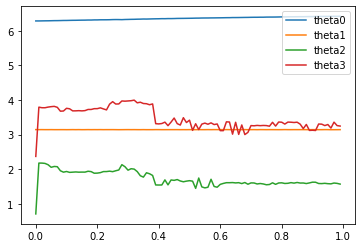

In [166]:
for i in range(4):
    plt.plot(betas, [result[i] for result in results_angles], label=f'theta{i}')
plt.legend(loc='best')
plt.show()

¯\_(ツ)_/¯

### Comparing different initial angles 

In [45]:
data = []
def try_fun(a):
    print(a)
    return False

In [47]:
%%time
d = 2
beta = 1 
resultsAngles = []
for i in range(10):
    # we initialize the angles randomnly at first
    angles = tfd.random_angles(4*d)
    # the reference state is
    tfd_ref = tfd_generator().generate_tfd(beta)
    # we build the QAOA circuit
    qaoa = tfd.QAOA_TFD(3, d, angles)
    # for the optimization we use minimize with the following args
    optimizer = lambda f, theta: minimize(f, theta, method='COBYLA', tol=1e-2, options={'maxiter': 1000})
    # we define the variational algorithm
    cooker = tfd.StateCooker(qaoa, tfd_ref, 'aer_simulator', optimizer)
    resultsAngles.append(cooker.optimize())

CPU times: user 19.7 s, sys: 539 ms, total: 20.2 s
Wall time: 19.2 s


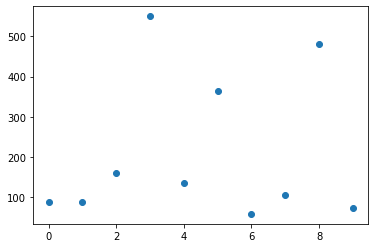

In [42]:
iterationsAngles = [result.nfev for result in resultsAngles]
plt.plot(iterationsAngles, 'o')
plt.show()

In [30]:
resultsAngles[0]

     fun: 0.22666825273819213
   maxcv: 0.0
 message: 'Optimization terminated successfully.'
    nfev: 54
  status: 1
 success: True
       x: array([1.86820035, 6.27754945, 3.58337413, 4.95342562, 1.93243424,
       6.27420685, 0.60791953, 4.92553434])

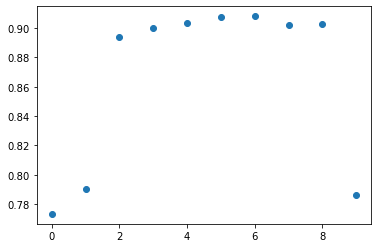

In [29]:
fidelitiesAngles = [1-result.fun for result in resultsAngles]
plt.plot(fidelitiesAngles, 'o')
plt.show()

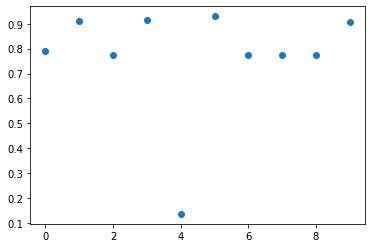

In [23]:
fidelitiesAngles = [1-result.fun for result in resultsAngles]
plt.plot(fidelitiesAngles, 'o')
plt.show()

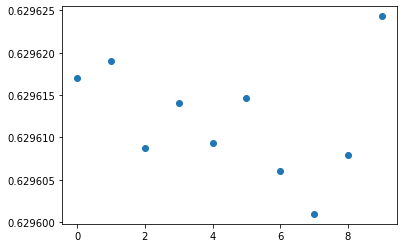

In [20]:
fidelitiesAngles = [1-result.fun for result in resultsAngles]
plt.plot(fidelitiesAngles, 'o')
plt.show()

NameError: name 'minimize' is not defined